<a href="https://colab.research.google.com/github/GabrielBatavia/Learn_TensorFlow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definition for a regression problem but in our case, we're going to simplify it : predicting a numerical variable based on some other combination of variables, even shorter...predicting a number.

In [2]:
# Import TensorFlow

import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

In [3]:
import numpy as np
import matplotlib.pyplot as plt

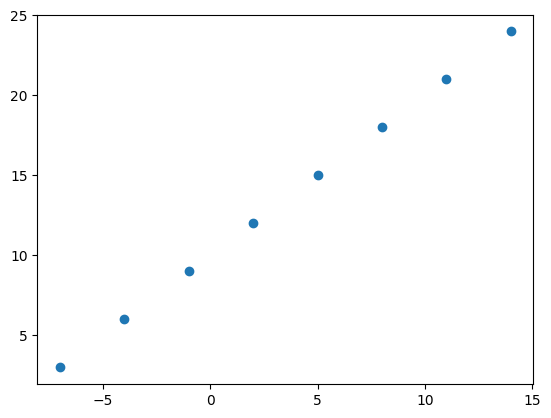

In [4]:
# Creating features

x = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

# Create labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

# Visualize it
plt.scatter(x, y);

In [5]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [6]:
# Create a demo tensor for out housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
x[0], y[0]

(-7.0, 3.0)

In [8]:
input_shape = x[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [9]:
x[0].ndim

0

In [10]:
# Turn our Numpy arrays into tensors with dtype 32

X = tf.constant(x, dtype=tf.float32)
Y = tf.constant(y, dtype=tf.float32)

X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), ())

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.

2. **Compiling a model** - define the loss function (in other words, the function wich tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the preformance of our model)

3. Fitting a model - letting the model try to find patters between X & y (features and labels)

In [12]:
# Opetionally, the first layer can receive an 'input_shape' argument :
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape=(16,)))

# Afterwards, we do automatic shape inference :
# model.add(tf.keras.layers.Dense(4))

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))
# ...

In [13]:
# Set random seed

tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient decent
              metrics = ["mae"])

# 3. Fit the model
# model.fit(X, Y, epochs=5) # BREAK IN UPDATED TENSOR VERSION
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 19.7265 - mae: 19.7265
Epoch 2/5
1/1 [==============================] - 0s 28ms/step - loss: 19.4452 - mae: 19.4452
Epoch 3/5
1/1 [==============================] - 0s 18ms/step - loss: 19.1640 - mae: 19.1640
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 18.8827 - mae: 18.8827
Epoch 5/5
1/1 [==============================] - 0s 19ms/step - loss: 18.6015 - mae: 18.6015


In [14]:
# Check our X and Y
x, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [15]:
# Try make prediction
model.predict([17.0])

1/1 [==============================] - 0s 304ms/step


array([[-18.09054]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - ere we might add more layers, increse the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might chang ethe optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn form)

In [16]:
# Let's rebuild our model

# 1. Create the model
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
# model.fit(X, Y, epochs=5) # BREAK IN UPDATED TENSOR VERSION
model1.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 640ms/step - loss: 8.8788 - mae: 8.8788
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 8.7463 - mae: 8.7463
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 8.6138 - mae: 8.6138
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 8.4813 - mae: 8.4813
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 8.3488 - mae: 8.3488
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 8.2163 - mae: 8.2163
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 8.0838 - mae: 8.0838
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 7.9513 - mae: 7.9513
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 7.8188 - mae: 7.8188
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 7.6863 - mae: 7.6863
Epoch 11/100
1/1 [==============================] - 0s 16ms/step - lo

In [17]:
# Try make prediction
model1.predict([17.0])

1/1 [==============================] - 0s 139ms/step


array([[30.366028]], dtype=float32)

In [18]:
# re-write the model by my self and improve one thing to get better

# 1. Create the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), # chang the optimizers from SGD to adam
              metrics = ["mae"])

# 3. Fit the model
# model.fit(X, Y, epochs=5) # BREAK IN UPDATED TENSOR VERSION
model2.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 861ms/step - loss: 14.4644 - mae: 14.4644
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 14.4599 - mae: 14.4599
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 14.4554 - mae: 14.4554
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 14.4509 - mae: 14.4509
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 14.4464 - mae: 14.4464
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 14.4419 - mae: 14.4419
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 14.4374 - mae: 14.4374
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 14.4329 - mae: 14.4329
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 14.4284 - mae: 14.4284
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 14.4239 - mae: 14.4239
Epoch 11/100
1/1 [==============================]

In [19]:
# Try make prediction
model2.predict([17.0])

1/1 [==============================] - 0s 135ms/step


array([[-2.884316]], dtype=float32)

In [27]:
# re-write the model

# 1. Create the model (with 100 hidden units )
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model3.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ["mae"])

# 3. Fit the model
# model.fit(X, Y, epochs=5) # BREAK IN UPDATED TENSOR VERSION
model3.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 798ms/step - loss: 15.6017 - mae: 15.6017
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 14.5655 - mae: 14.5655
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 13.7506 - mae: 13.7506
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 12.9360 - mae: 12.9360
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 12.1178 - mae: 12.1178
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 11.2941 - mae: 11.2941
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 10.4637 - mae: 10.4637
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 9.6252 - mae: 9.6252
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 8.7767 - mae: 8.7767
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 7.9167 - mae: 7.9167
Epoch 11/100
1/1 [==============================] - 0s

In [29]:
# Try make prediction
model3.predict([17.0])

1/1 [==============================] - 0s 115ms/step


array([[27.640278]], dtype=float32)

## Evaluating Model

Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...

Evaluation = visualize

it's good idea to visualize :
* The data - what data we working with? what does it look like?
* The model = what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the origin label)

In [30]:
# Make a bigger dataset

x = tf.range(-100, 100, 4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [31]:
# Make labels for the dataset

y = x + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

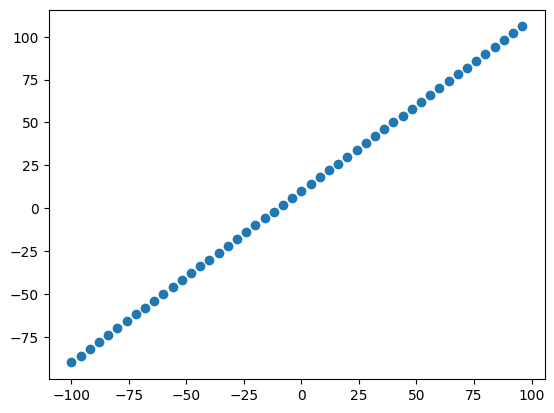

In [32]:
# Visualize the data

import matplotlib.pyplot as plt

plt.scatter(x, y)

### The 3 sets